In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt

import gym

from agents.base import PIDAgent
from agents.tdagent import TDAgent

In [2]:
def reference_fn_generator():
    random_offset = np.random.random() * 2 * np.pi

    def reference_fn(t):
        offset_t = t + random_offset

        return 0.1 * (  (0.2 * np.sin(0.4 * offset_t))
                      + (0.4 * np.sin(0.8 * offset_t))
                      + (0.1 * np.sin(1.6 * offset_t))
                      + (0.3 * np.sin(3.2 * offset_t))
                     )

    return reference_fn

In [3]:
def dyad_slider_prep(seed = 1234):

    env = gym.make('gym_dyad_slider:DyadSlider-v0',
                   simulation_freq_Hz = 500,
                   action_freq_Hz = 50,

                   episode_length_s = 20.0,

                   agent_force_min = 0.0, #N
                   agent_force_max = 100.0, #N

                   slider_mass = 3.0, #kg
                   slider_limits = np.array([-0.125, 0.125]), #m

                   reference_generator = reference_fn_generator,

                   #integration = "rk45",
                   )

    return env

In [4]:
def empirical_eval(dyad_slider_env, agents, number_of_episodes):
    total_reward = 0.0

    env_state = dyad_slider_env.reset()
    for episode in range(number_of_episodes):
        for step in range(dyad_slider_env.max_episode_steps):
             env_state, env_reward, done = dyad_slider_env.step([agents[0].get_force(env_state, record_history = False),
                                                                 agents[1].get_force(env_state, record_history = False)])
             total_reward += env_reward

             if done:
                 agents[0].reset()
                 agents[1].reset()
                 env.reset()
                 break

    return total_reward

In [5]:
env = dyad_slider_prep()
p1 = PIDAgent(-30, 0.0, -30,
              perspective = 0,
              force_max = env.agent_force_max,
              force_min = env.agent_force_min,
              c_effort = 0.0,
             )


p2 =  TDAgent(
              perspective = 1,
              force_max = env.agent_force_max,
              force_min = env.agent_force_min,
              c_effort = 0.0,
              Q_init = 300.0,
              force_delta_max = 0.1,
              epsilon_start = 0.5,
              epsilon_decay = 0.0001,
              epsilon_final = 0.01,
             )

/var/home/wesliao/Sources/rl/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


64.56% estimated time remaining: 00:04:0700:01:46 00:31:32 01:02:35 01:02:29 01:02:27 01:02:25 01:02:20 01:02:17 01:10:01 01:10:00 01:10:00 01:09:58 01:09:57 01:09:5001:08:43 01:08:2601:08:25 01:08:24 01:08:23 01:07:15 01:07:15 01:07:13 01:07:12 01:07:12 01:07:11 01:07:10 01:07:08 01:07:0701:07:06 01:07:06 01:07:04 01:07:02 01:07:01 01:07:00 01:06:59 01:06:59 01:06:57 01:06:57 01:06:56 01:24:04 01:24:0301:24:02 01:24:01 01:23:59 01:23:47 01:23:43 01:18:24 01:18:18 01:18:07 01:24:44 01:24:31 01:24:30 01:33:51 01:33:50 01:33:48 01:33:47 01:33:46 01:33:45 01:33:42 01:19:25 01:19:21 01:19:18 01:19:15 01:20:52 01:20:51 01:20:48 01:20:45 01:20:41 01:20:40 01:20:35 01:20:3401:20:32 01:20:31 01:20:30 01:20:29 01:34:11 01:34:09 01:34:04 01:33:59 01:33:49 01:33:45 01:33:44 01:33:43 01:36:47 01:36:46 01:36:45 01:36:44 01:36:42 01:36:41 01:36:40 01:36:40 01:36:38 01:27:18 01:27:16 01:27:14 01:27:0601:26:59 01:26:51 01:26:42 01:24:34 01:24:33 01:24:32 01:24:31 01:24:29 01:24:26 01:24:26 01:24:25 01

100.00% estimated time remaining: 00:00:0000:04:05 00:03:18 00:03:17 00:05:13 00:05:11 00:11:16 00:11:12 00:11:08 00:05:39 00:03:25 00:05:0000:06:40 00:06:34 00:05:24 00:07:35 00:05:47 00:05:44 00:05:41 00:05:08 00:04:02 00:03:55 00:03:46 00:03:41 00:03:40 00:03:27 00:03:52 00:03:57 00:03:43 00:03:42 00:03:26 00:03:06 00:03:01 00:03:00 00:02:05 00:02:20 00:02:07 00:02:06 00:02:06 00:02:06 00:02:06 00:02:06 00:02:05 00:02:05 00:02:05 00:02:05 00:02:05 00:02:04 00:02:04 00:02:04 00:02:27 00:02:27 00:02:27 00:02:26 00:02:26 00:02:26 00:02:26 00:02:25 00:02:25 00:02:25 00:02:25 00:02:24 00:02:24 00:02:24 00:02:23 00:02:11 00:02:11 00:02:11 00:02:10 00:02:10 00:02:10 00:02:10 00:02:09 00:02:09 00:02:09 00:02:09 00:02:08 00:02:08 00:02:08 00:02:08 00:02:08 00:02:27 00:02:27 00:02:26 00:02:26 00:02:26 00:02:25 00:02:25 00:02:25 00:02:25 00:02:24 00:02:24 00:02:24 00:02:23 00:02:23 00:02:23 00:01:58 00:01:58 00:01:58 00:01:58 00:01:57 00:01:57 00:01:57 00:01:56 00:01:56 00:01:56 00:01:56 00:01

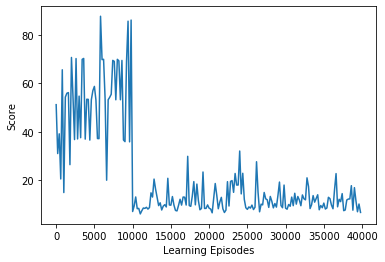

In [6]:
number_of_episodes = 40000
eval_resolution = 200
eval_period = number_of_episodes / eval_resolution
eval_episodes = 10

eval_reward = np.zeros((eval_resolution,))

period_time = time.perf_counter()
time_per_episode_s = 0.0

for episode_ndx in range(number_of_episodes):
    remaining_time_s = time_per_episode_s * (number_of_episodes - episode_ndx)
    print("{:2.2%} estimated time remaining:".format(episode_ndx/number_of_episodes),
          time.strftime("%H:%M:%S", time.gmtime(remaining_time_s)), end="\r")
    env_state = env.reset()

    episode_reward_total = 0.0

    
    #After 1/4th of the episodes, overwrite the PID agent with another TDAgent
    if episode_ndx == (number_of_episodes / 4):
        p1 = TDAgent(
                     perspective = 0,
                     force_max = env.agent_force_max,
                     force_min = env.agent_force_min,
                     c_effort = 0.0,
                     Q_init = 300.0,
                     force_delta_max = 0.1,
                     epsilon_start = 0.5,
                     epsilon_decay = 0.0001,
                     epsilon_final = 0.01,
                    )

    for step in range(env.max_episode_steps):
        env_state, env_reward, done = env.step([p1.get_force(env_state),
                                             p2.get_force(env_state)])
        episode_reward_total += env_reward

        if episode_ndx % eval_period == 0:
            #env.render()
            pass

        p1.give_reward(env_reward, done, next_environment_state = env_state)

        #Only reward/update p2 when p1 is a PID agent or in the last 1/4th of the episodes
        # this is so p1 can learn on a static p2
        if episode_ndx < (number_of_episodes / 4) or episode_ndx > ((3 * number_of_episodes) / 4):
            p2.give_reward(env_reward, done, next_environment_state = env_state)

        if done:
            p1.reset()
            p2.reset()
            env.reset()
            break

    if episode_ndx % eval_period == 0:
        eval_reward[int(episode_ndx / eval_period)] = empirical_eval(env, [p1, p2], eval_episodes)
        time_per_episode_s = (time.perf_counter() - period_time) / (eval_period + eval_episodes)
        period_time = time.perf_counter()

print('')
print("complete")


env.close()

plt.figure()
plt.plot(np.arange(eval_resolution) * eval_period, eval_reward)
plt.ylabel("Score")
plt.xlabel("Learning Episodes")

plt.show()